In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Read the dataset from an Excel file
ca_df = pd.read_excel(r'C:/Users/katie/OneDrive/California_Fatalities.xlsx')

# Rename columns by replacing spaces with underscores
ca_df.columns = ca_df.columns.str.replace(' ', '_')

# Replace single quotes with an empty string in column names
ca_df.columns = ca_df.columns.str.replace("'", "")

ca_df

,Unique_ID,Subjects_name,Subjects_age,Subjects_gender,Subjects_race,Subjects_race_with_imputations,Imputation_probability,URL_of_image_of_deceased,Date_of_injury_resulting_in_death_(month/day/year),Location_of_injury_(address),...,A_brief_description_of_the_circumstances_surrounding_the_death,"Dispositions/Exclusions_INTERNAL_USE,_NOT_FOR_ANALYSIS",Intentional_Use_of_Force_(Developing),Link_to_news_article_or_photo_of_official_document,"Symptoms_of_mental_illness?_INTERNAL_USE,_NOT_FOR_ANALYSIS",Video,Date&Description,Unique_ID_formula,Unique_identifier_(redundant),Date_(Year)
0,25746,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,2000-01-01,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746,2000.0
1,1,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,2000-01-02,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Vehicle/Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1,2000.0
2,8,Adrian Dolby,31,Male,Race unspecified,European-American/White,0.436938,NaN,2000-01-06,3400 block Gray Street,...,SWAT officers shot and killed Adrian Dolby sho...,Unreported,"Intentional Use of Force, Deadly",https://docs.google.com/document/d/1DgZgZi6c4t...,Unknown,NaN,1/6/2000: SWAT officers shot and killed Adrian...,NaN,8,2000.0
3,10,Joseph Gumpert,28,Male,Race unspecified,European-American/White,0.680698,NaN,2000-01-07,9600 block Cheddar Street,...,Joseph Gumpert stopped breathing after a scuff...,Unreported,Yes,http://articles.latimes.com/2000/jan/10/local/...,Unknown,NaN,1/7/2000: Joseph Gumpert stopped breathing aft...,NaN,10,2000.0
4,13,Sonny Daniel Diaz,24,Male,Race unspecified,Hispanic/Latino,0.990977,NaN,2000-01-09,23600 block Suncrest Avenue,...,Deputies shot and killed Sonny Daniel Diaz whe...,Unreported,"Intentional Use of Force, Deadly",https://drive.google.com/file/d/0B62PuBu1vKRLc...,Unknown,NaN,1/9/2000: Deputies shot and killed Sonny Danie...,NaN,13,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,28294,Name withheld by police,NaN,Male,Race unspecified,NaN,NaN,NaN,2020-06-22,41945 Boardwalk,...,Reports of a robbery at C.V. Guns & Tackle cam...,Pending investigation,"Intentional Use of Force, Deadly",https://kesq.com/news/breaking-news/2020/06/22...,No,NaN,6/22/2020: Reports of a robbery at C.V. Guns &...,NaN,28294,2020.0
4544,28301,Name withheld by police,NaN,Female,Asian/Pacific Islander,Asian/Pacific Islander,not imputed,NaN,2020-06-24,22000 block Loumont Drive,...,"About 1 a.m., deputies responded to a burglary...",Pending investigation,"Intentional Use of Force, Deadly",https://losangeles.cbslocal.com/2020/06/24/arm...,Unknown,NaN,"6/24/2020: About 1 a.m., deputies responded to...",NaN,28301,2020.0
4545,28309,Skyleur Young,31,Male,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,2020-06-24,"CA-210, west of I-215",...,"Around 9:30 a.m., deputies responded to a susp...",Pending investigation,"Intentional Use of Force, Deadly",https://ktla.com/news/local-news/wb-210-freewa...,No,NaN,"6/24/2020: Around 9:30 a.m., deputies responde...",NaN,28309,NaN
4546,28310,Veronica Rojas,65,Female,Hispanic/Latino,Hispanic/Latino,not imputed,https://fatalencounters.org/wp-content/uploads...,2020-06-24,1200 block East Avenue S,...,Border Patrol agents briefly chased the car be...,Pending investigation,Pursuit,https://abc7.com/palmdale-chase-crash-2-killed...,No,NaN,6/24/2020: Border Patrol agents briefly chased...,NaN,28310,NaN


In [10]:
# Define the keyword(s) to be searched for 
keyword = "withheld by police"

# Create a boolean mask by checking if the brief description column contains the keyword

search_mask = ca_df['A_brief_description_of_the_circumstances_surrounding_the_death'].str.contains(keyword, case=False, na=False)

# Use the mask to filter the DataFrame and get rows that contain the keyword(s)
search_results = ca_df[search_mask]


# Calculate the total number of rows in the search results
total_count = len(search_results)

# Display the total count
print("Total Rows Containing 'withheld by police':", total_count)

Total Rows Containing 'withheld by police': 47


In [11]:
# Define the keyword(s) to be searched for 
keyword = "shot and killed by police"

# Create a boolean mask by checking if the brief description column contains the keyword

search_mask = ca_df['A_brief_description_of_the_circumstances_surrounding_the_death'].str.contains(keyword, case=False, na=False)

# Use the mask to filter the DataFrame and get rows that contain the keyword(s)
search_results = ca_df[search_mask]


# Calculate the total number of rows in the search results
total_count = len(search_results)

# Display the total count
print("Total Rows Containing 'shot and killed by police':", total_count)

Total Rows Containing 'shot and killed by police': 23


In [12]:
# Define the keyword(s) to be searched for 
keyword = "shot and killed the man"

# Create a boolean mask by checking if the brief description column contains the keyword

search_mask = ca_df['A_brief_description_of_the_circumstances_surrounding_the_death'].str.contains(keyword, case=False, na=False)

# Use the mask to filter the DataFrame and get rows that contain the keyword(s)
search_results = ca_df[search_mask]


# Calculate the total number of rows in the search results
total_count = len(search_results)

# Display the total count
print("Total Rows Containing 'shot and killed the man':", total_count)

Total Rows Containing 'shot and killed the man': 32


In [13]:
# Define the keyword(s) to be searched for 
keyword = "mental illness"

# Create a boolean mask by checking if the brief description column contains the keyword

search_mask = ca_df['A_brief_description_of_the_circumstances_surrounding_the_death'].str.contains(keyword, case=False, na=False)

# Use the mask to filter the DataFrame and get rows that contain the keyword(s)
search_results = ca_df[search_mask]


# Calculate the total number of rows in the search results
total_count = len(search_results)

# Display the total count
print("mental illness':", total_count)

mental illness': 16


In [52]:
# Define the keywords as a regular expression pattern
keywords = r'swallowing|swallowed'

# Create a boolean mask by checking if the brief description column contains the keywords
search_mask = ca_df['A_brief_description_of_the_circumstances_surrounding_the_death'].str.contains(keywords, case=False, na=False)

# Count the occurrences of rows containing the keyword(s)
count_swallowed = search_mask.sum()

# Display the count
print("Count of 'Swallowed' or 'Swallowing':", count_swallowed)

Count of 'Swallowed' or 'Swallowing': 9


In [15]:
import matplotlib.pyplot as plt

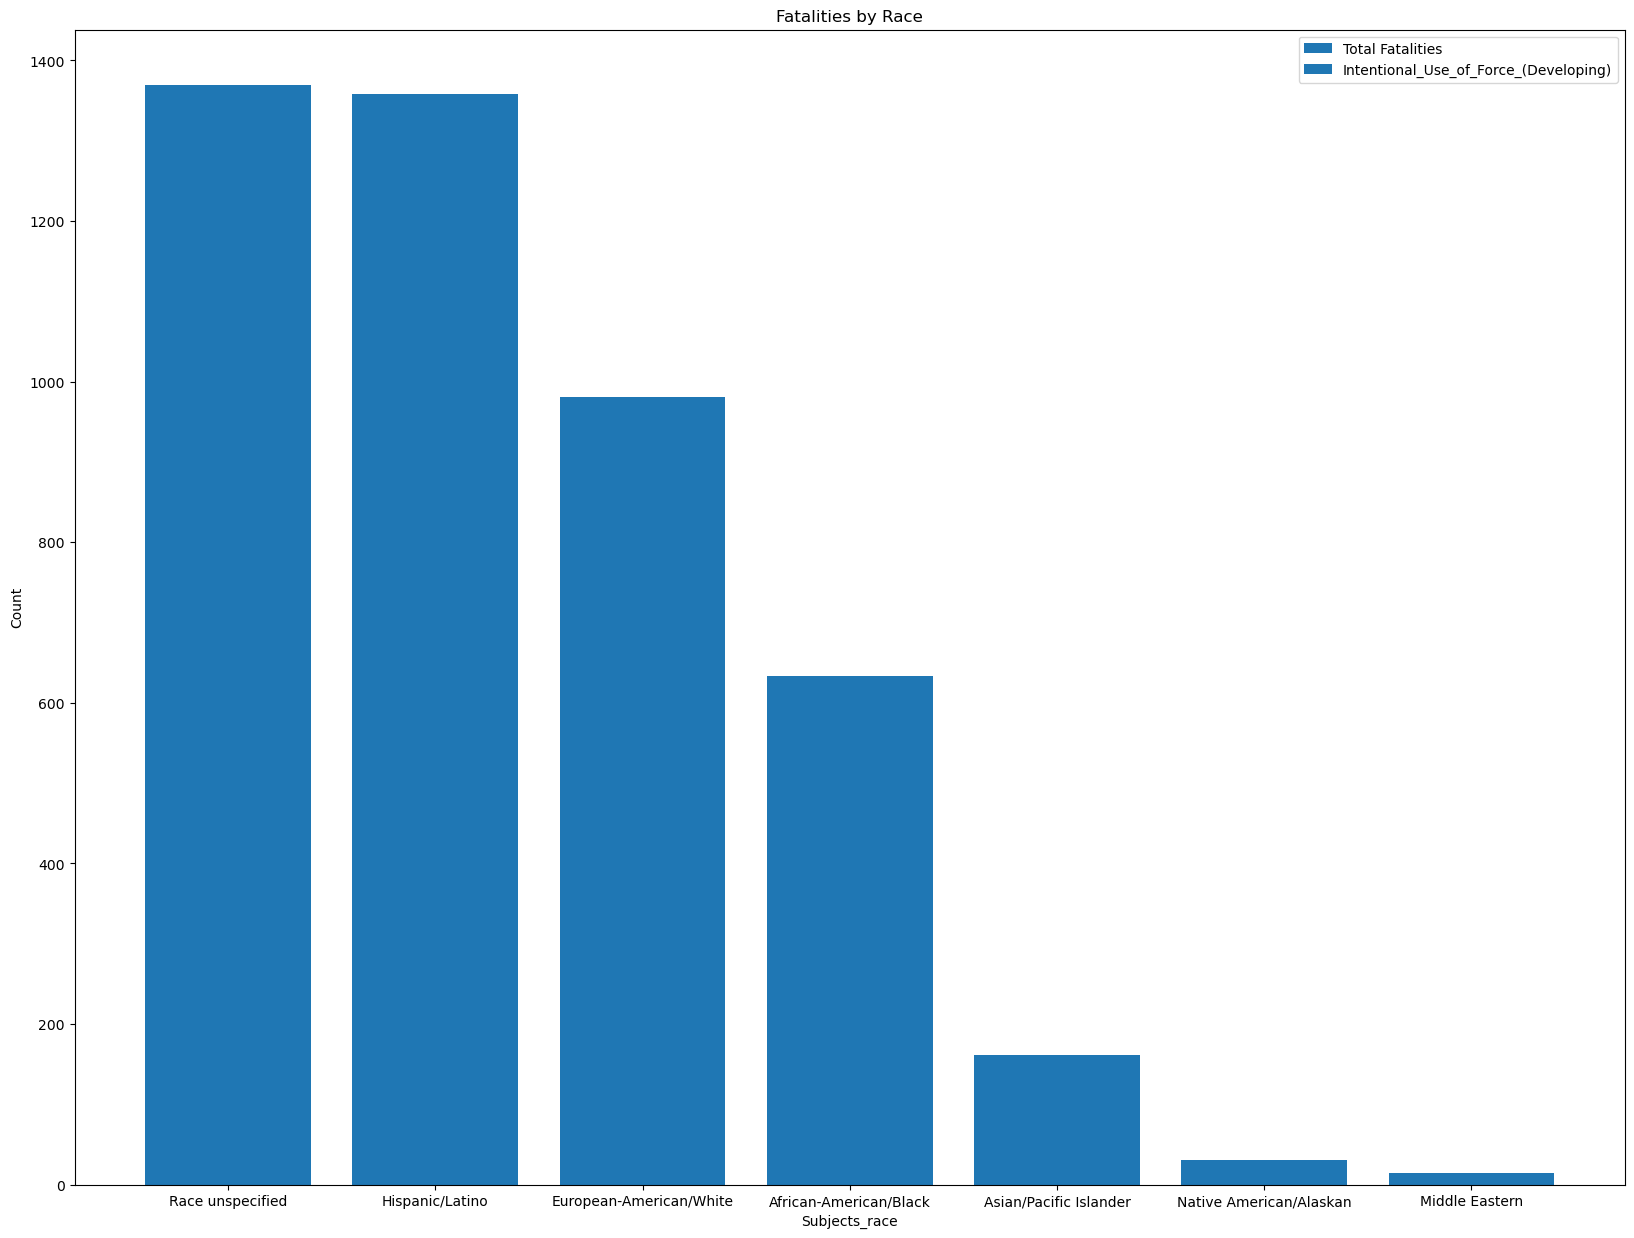

In [18]:

race_counts = ca_df['Subjects_race'].value_counts()
officer_involved_counts = ca_df[ca_df['Intentional_Use_of_Force_(Developing)'] == 1]['Subjects_race'].value_counts()

plt.figure(figsize=(20, 15))
plt.bar(race_counts.index, race_counts.values, label='Total Fatalities')
plt.bar(officer_involved_counts.index, officer_involved_counts.values, label='Intentional_Use_of_Force_(Developing)', alpha=0.7)
plt.xlabel('Subjects_race')
plt.ylabel('Count')
plt.title('Fatalities by Race')
plt.legend()
plt.show()

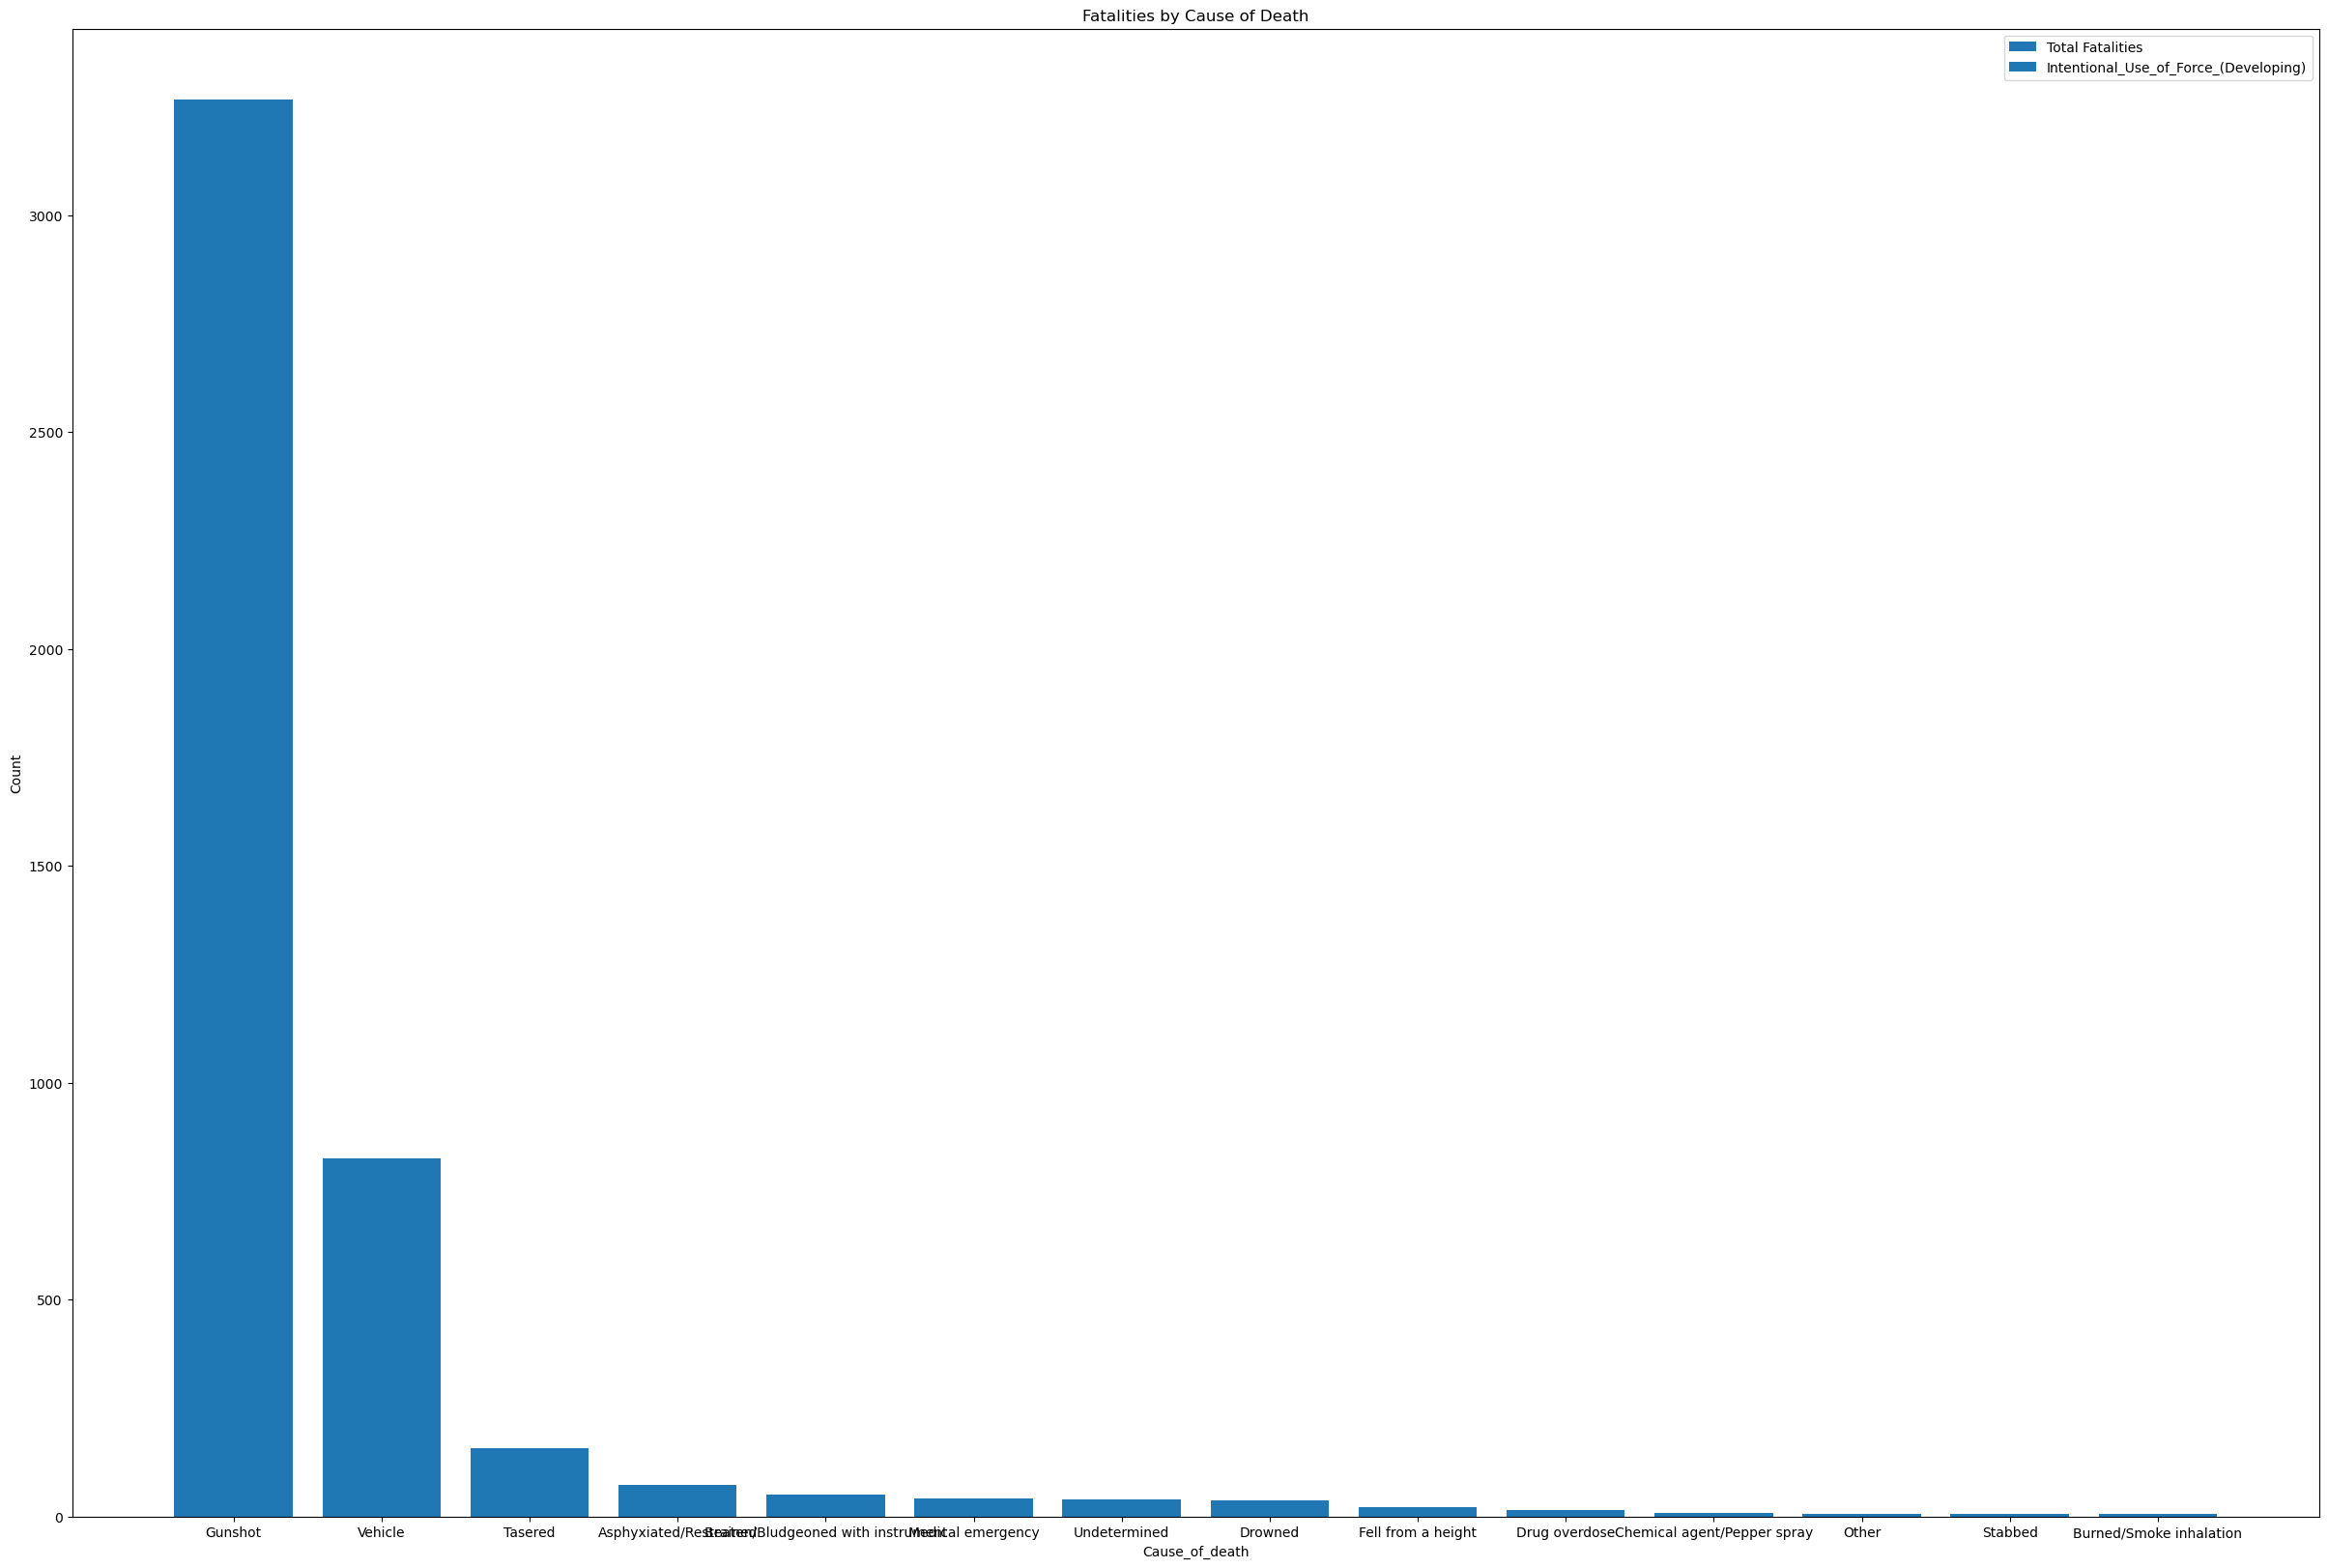

In [56]:

race_counts = ca_df['Cause_of_death'].value_counts()
officer_involved_counts = ca_df[ca_df['Intentional_Use_of_Force_(Developing)'] == 1]['Cause_of_death'].value_counts()

plt.figure(figsize=(30, 20))
plt.bar(race_counts.index, race_counts.values, label='Total Fatalities')
plt.bar(officer_involved_counts.index, officer_involved_counts.values, label='Intentional_Use_of_Force_(Developing)', alpha=0.7)
plt.xlabel('Cause_of_death')
plt.ylabel('Count')
plt.title('Fatalities by Cause of Death')
plt.legend()
plt.show()

In [28]:
# Combine Intentional Use of Force, Intenional Use of Force (Spelling error), and Yes together 
ca_df['Intentional_Use_of_Force_(Developing)'] = ca_df['Intentional_Use_of_Force_(Developing)'].replace(
    ['Intentional Use of Force, Deadly', 'Intenional Use of Force, Deadly', 'Yes'],
    'Use of Force, Deadly'
)

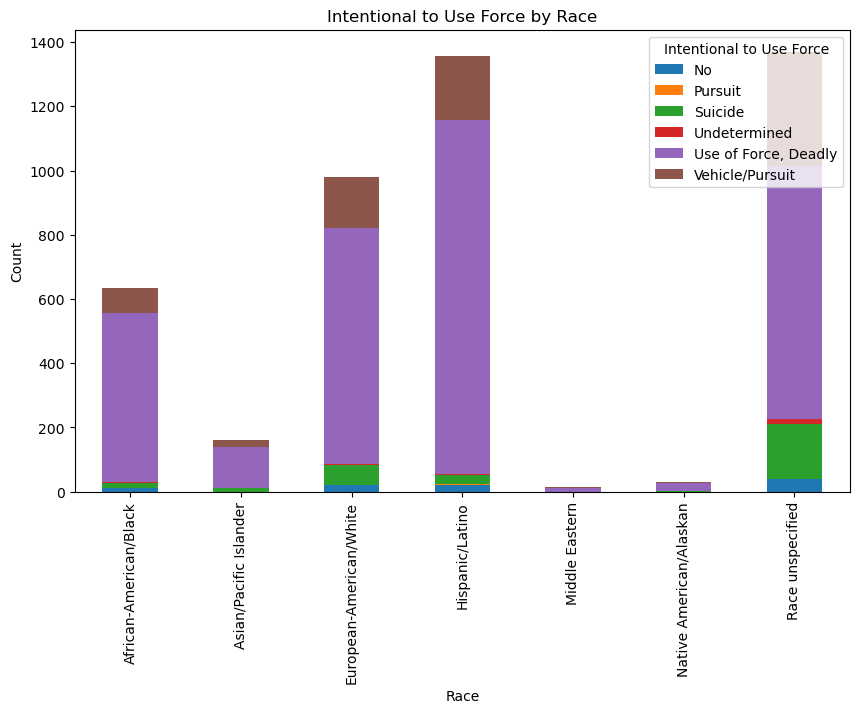

In [29]:
# Group the data by 'Race' and 'Intention_to_Use_Force' and count the occurrences
grouped = ca_df.groupby(['Subjects_race', 'Intentional_Use_of_Force_(Developing)']).size().unstack(fill_value=0)

# Create a bar chart and overlay the intention to use force
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Intentional to Use Force by Race')
plt.legend(title='Intentional to Use Force', loc='upper right')

# Show the plot
plt.show()

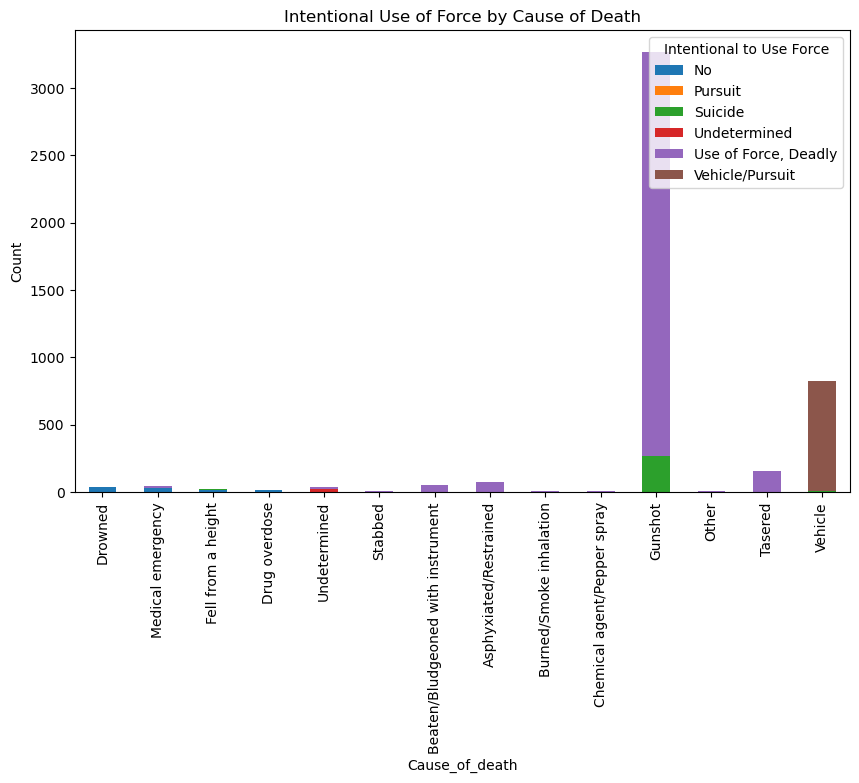

In [58]:
# Group the data by 'Race' and 'Intentional_Use_of_Force' and count the occurrences
grouped = ca_df.groupby(['Cause_of_death', 'Intentional_Use_of_Force_(Developing)']).size().unstack(fill_value=0)

# Sort the DataFrame by the majority class
grouped = grouped.sort_values(by='No', ascending=False)

# Create a bar chart and overlay the intention to use force
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Cause_of_death')
plt.ylabel('Count')
plt.title('Intentional Use of Force by Cause of Death')
plt.legend(title='Intentional to Use Force', loc='upper right')

# Show the plot
plt.show()

In [ ]:
# Group the data by 'Race' and 'Intentional_Use_of_Force' and count the occurrences
grouped = ca_df.groupby(['Subjects_race', 'Intentional_Use_of_Force_(Developing)']).size().unstack(fill_value=0)

# Sort the DataFrame by the majority class
grouped = grouped.sort_values(by='No', ascending=False)

# Create a bar chart and overlay the intention to use force
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Intentional to Use Force by Race')
plt.legend(title='Intentional to Use Force', loc='upper right')

# Show the plot
plt.show()

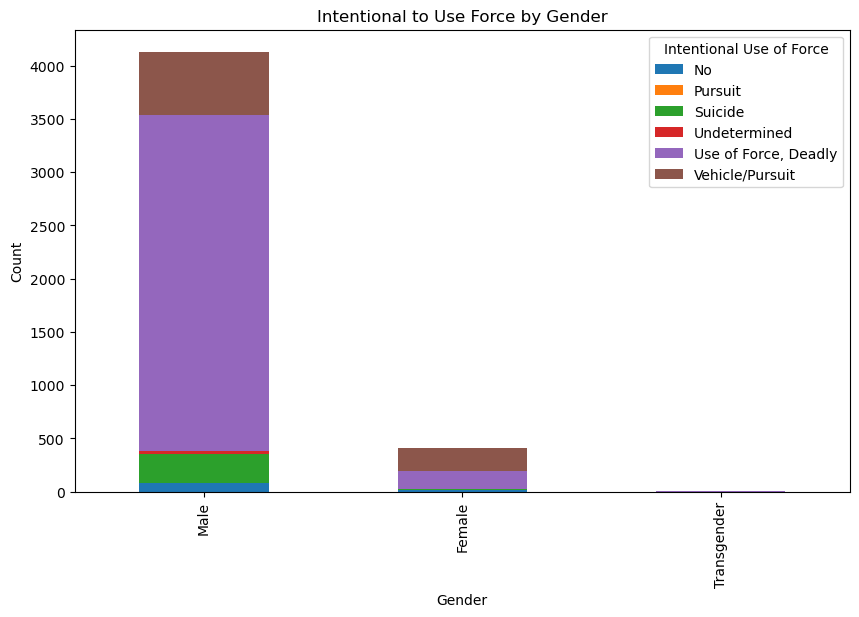

In [32]:
# Group the data by 'Gender' and 'Intention_to_Use_Force' and count the occurrences
grouped = ca_df.groupby(['Subjects_gender', 'Intentional_Use_of_Force_(Developing)']).size().unstack(fill_value=0)

# Sort the DataFrame by the majority class
grouped = grouped.sort_values(by='No', ascending=False)

# Create a bar chart and overlay the intention to use force
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Intentional to Use Force by Gender')
plt.legend(title='Intentional Use of Force', loc='upper right')

# Show the plot
plt.show()

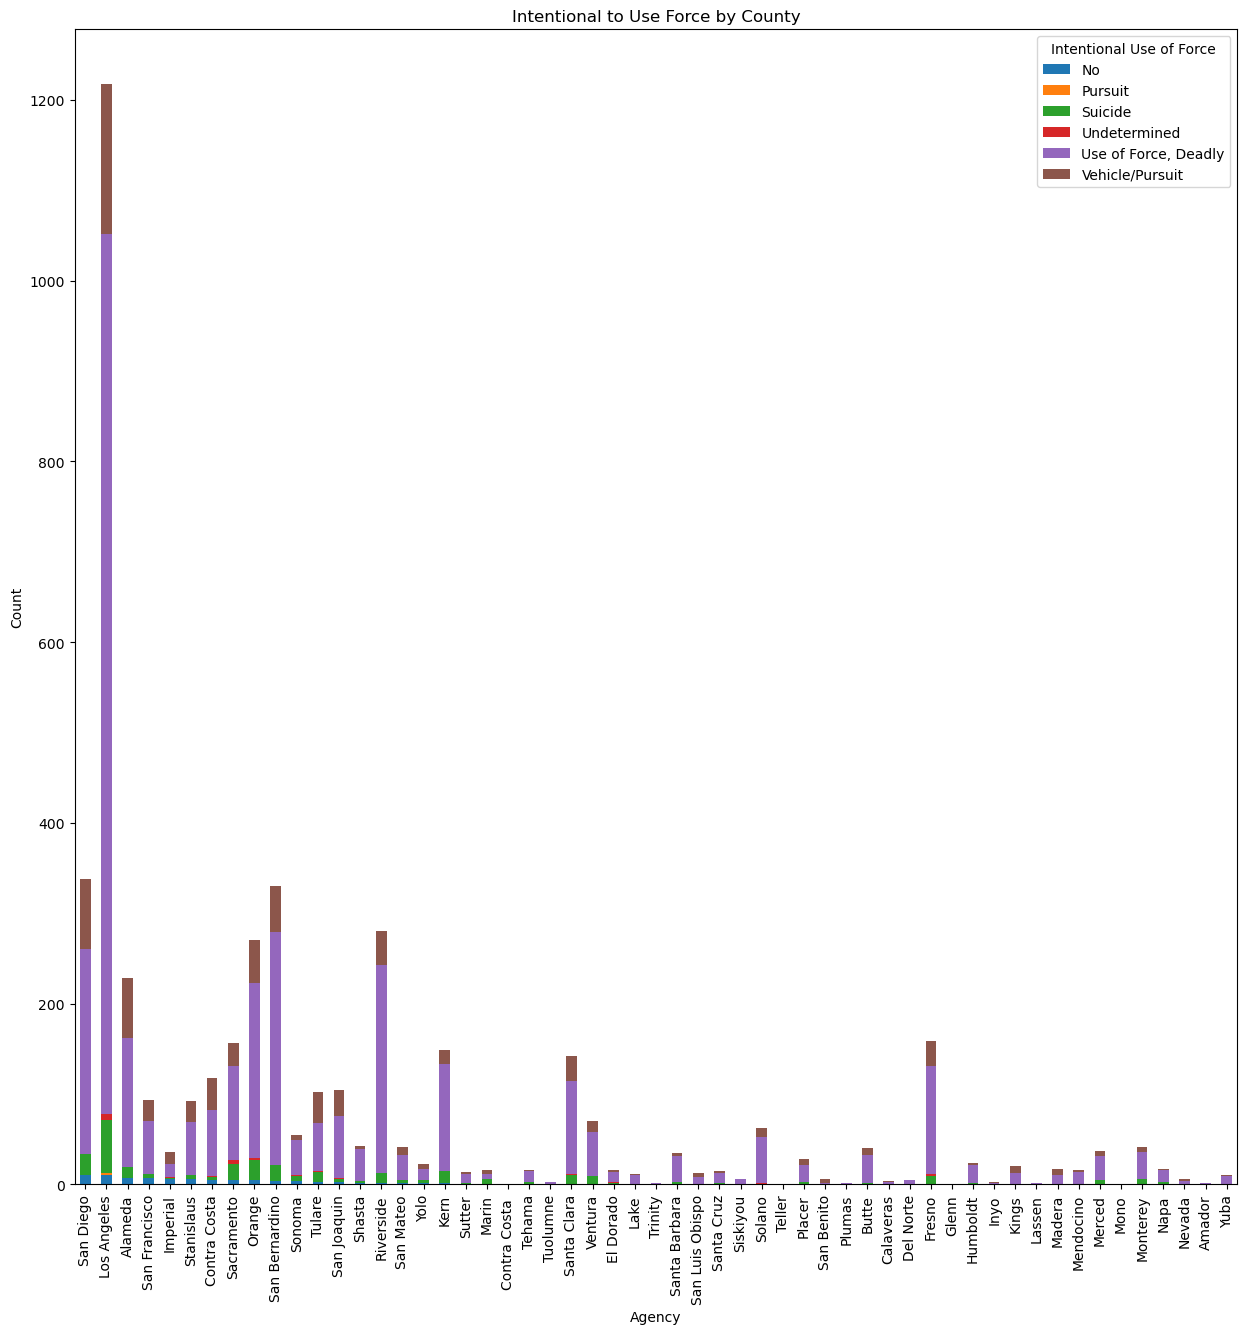

In [39]:
# Group the data by 'Location' and 'Intention_to_Use_Force' and count the occurrences
grouped = ca_df.groupby(['Location_of_death_(county)', 'Intentional_Use_of_Force_(Developing)']).size().unstack(fill_value=0)

# Sort the DataFrame by the majority class
grouped = grouped.sort_values(by='No', ascending=False)

# Create a bar chart and overlay the intention to use force
ax = grouped.plot(kind='bar', stacked=True, figsize=(15, 15))

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Intentional to Use Force by County')
plt.legend(title='Intentional Use of Force', loc='upper right')

# Show the plot
plt.show()

In [43]:
la_cases = ca_df[ca_df['Location_of_death_(county)'].isin(['Los Angeles'])]

# Display the LA cases
print(la_cases)

      Unique_ID            Subjects_name Subjects_age Subjects_gender  \
3            10           Joseph Gumpert           28            Male   
10           44       Alan Thomas Howard           35            Male   
11           51    Edgar Ernesto Fregoso           22            Male   
16           63          Alex Montelongo           25            Male   
18           67        Louis Thomas Pass           50            Male   
...         ...                      ...          ...             ...   
4525      28164  Name withheld by police          NaN            Male   
4532      28229             Jarrid Hurst           35            Male   
4535      19239       Michael Blu Thomas           63            Male   
4540      28275          Andres Guardado           18            Male   
4542      28288             Armani Brown           18          Female   

                Subjects_race Subjects_race_with_imputations  \
3            Race unspecified        European-American/Whit

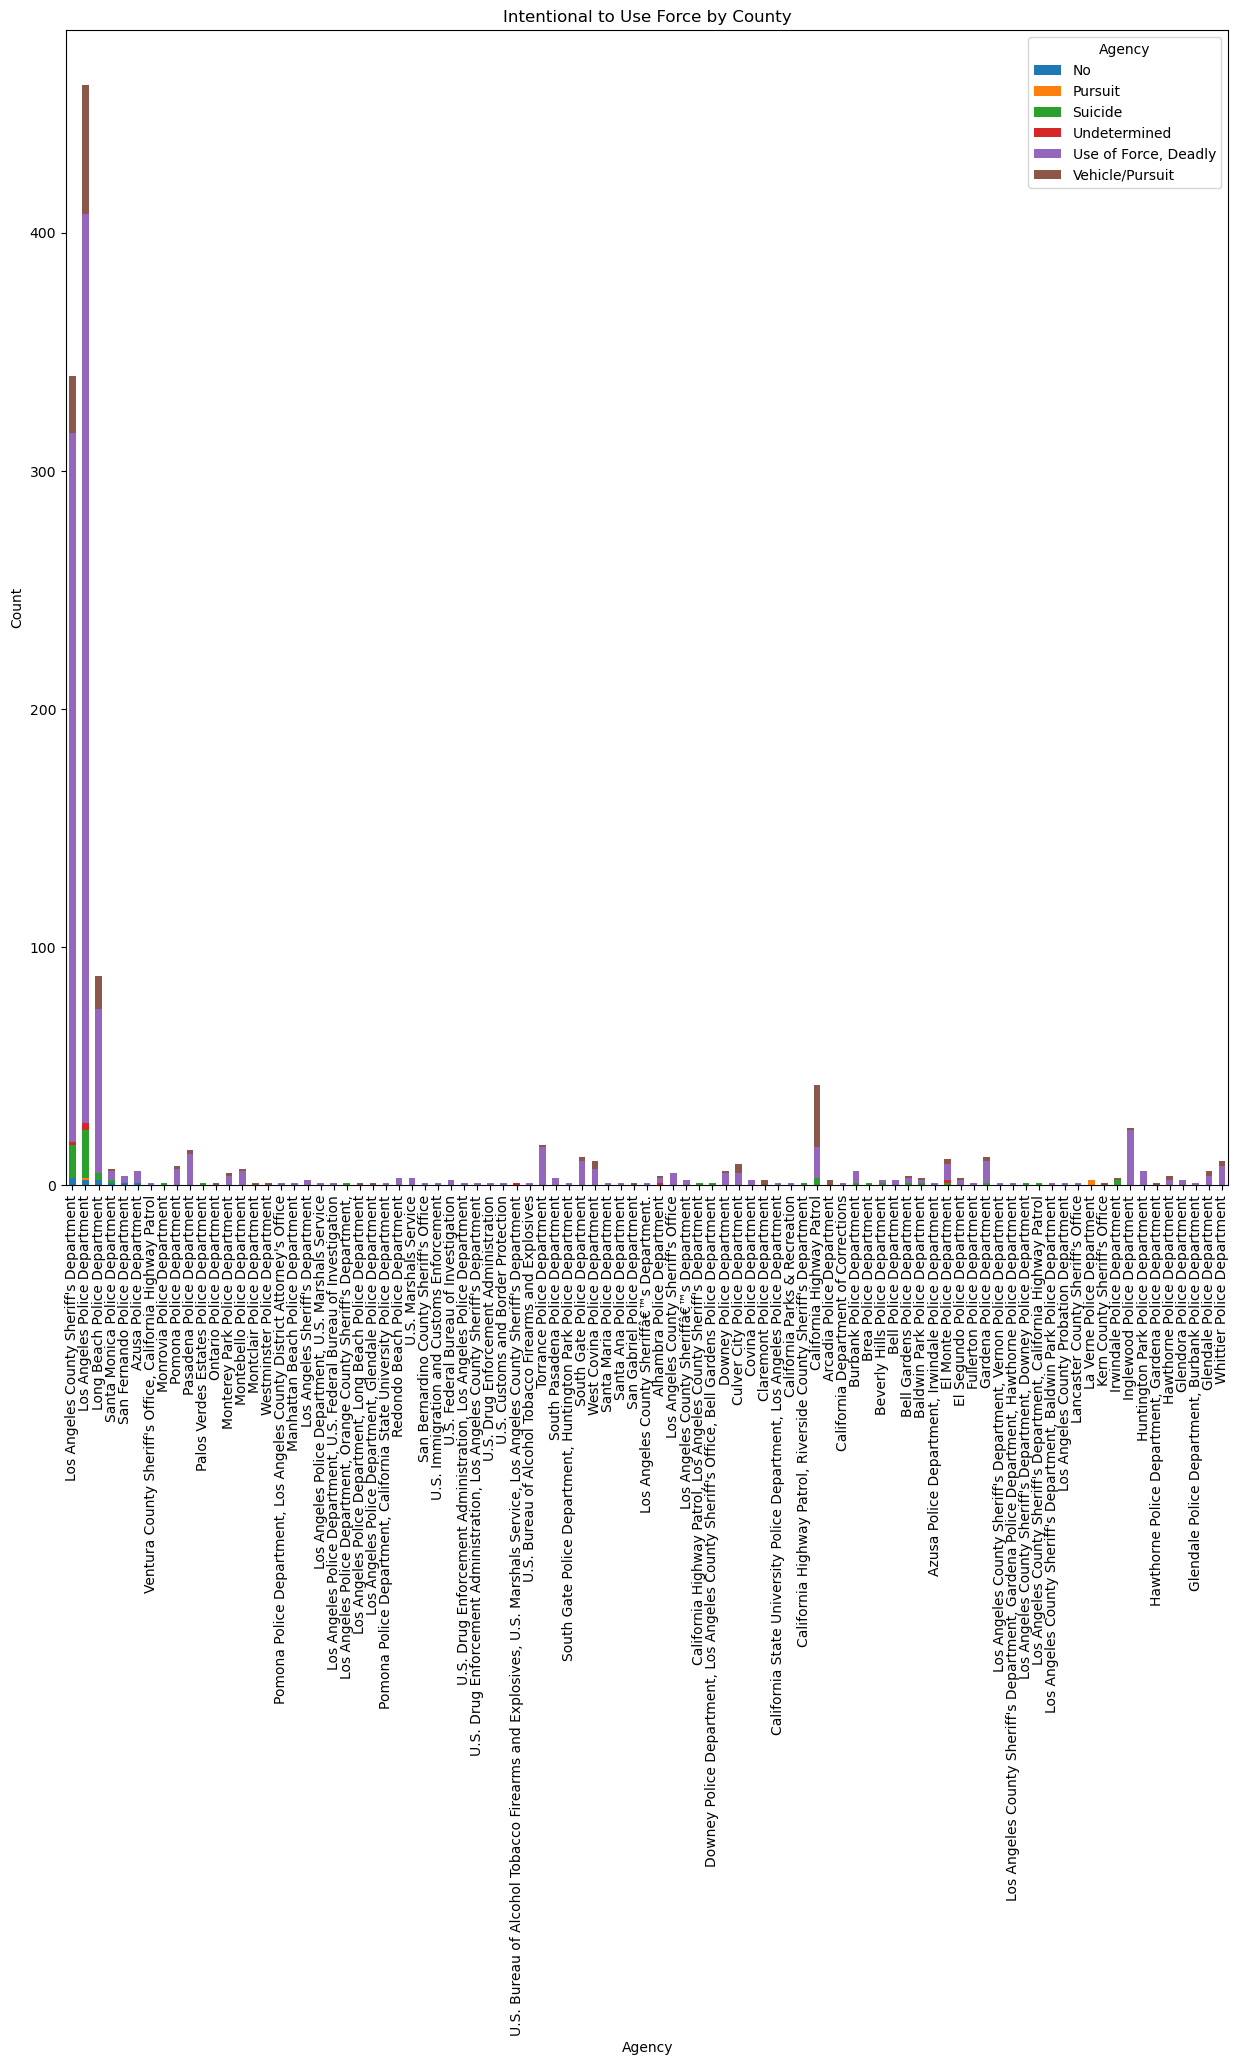

In [45]:
# Group the data by 'Location' and 'Intention_to_Use_Force' and count the occurrences
grouped = la_cases.groupby(['Agency_responsible_for_death', 'Intentional_Use_of_Force_(Developing)']).size().unstack(fill_value=0)

# Sort the DataFrame by the majority class
grouped = grouped.sort_values(by='No', ascending=False)

# Create a bar chart and overlay the intention to use force
ax = grouped.plot(kind='bar', stacked=True, figsize=(15, 15))

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Intentional to Use Force by County')
plt.legend(title='Agency', loc='upper right')

# Show the plot
plt.show()

In [47]:
print(la_cases['Agency_responsible_for_death'].unique())

['Downey Police Department' 'Long Beach Police Department'
 'Glendale Police Department' "Los Angeles County Sheriff's Department"
 'Los Angeles Police Department' nan 'El Segundo Police Department'
 'Inglewood Police Department' 'Whittier Police Department'
 'Los Angeles Police Department, U.S. Marshals Service'
 'California Highway Patrol' 'Gardena Police Department'
 'Culver City Police Department'
 'Los Angeles Police Department, Glendale Police Department'
 "U.S. Bureau of Alcohol Tobacco Firearms and Explosives, U.S. Marshals Service, Los Angeles County Sheriff's Department"
 'Torrance Police Department' 'El Monte Police Department'
 'Ontario Police Department' 'California Department of Corrections'
 'Redondo Beach Police Department' 'Burbank Police Department'
 'Pasadena Police Department'
 'Glendale Police Department, Burbank Police Department'
 "Los Angeles Police Department, Orange County Sheriff's Department,"
 'U.S. Bureau of Alcohol Tobacco Firearms and Explosives'
 'Los A

In [61]:
# Combine No, Suicide, Pursuit, and Vehicle/Pursuit together for the unintentional use of force column  
ca_df['Intentional_Use_of_Force_(Developing)'] = ca_df['Intentional_Use_of_Force_(Developing)'].replace(
    ['No', 'Suicide', 'Vehicle/Pursuit', 'Pursuit'],
    'Unintentional Use of Force, Deadly'
)

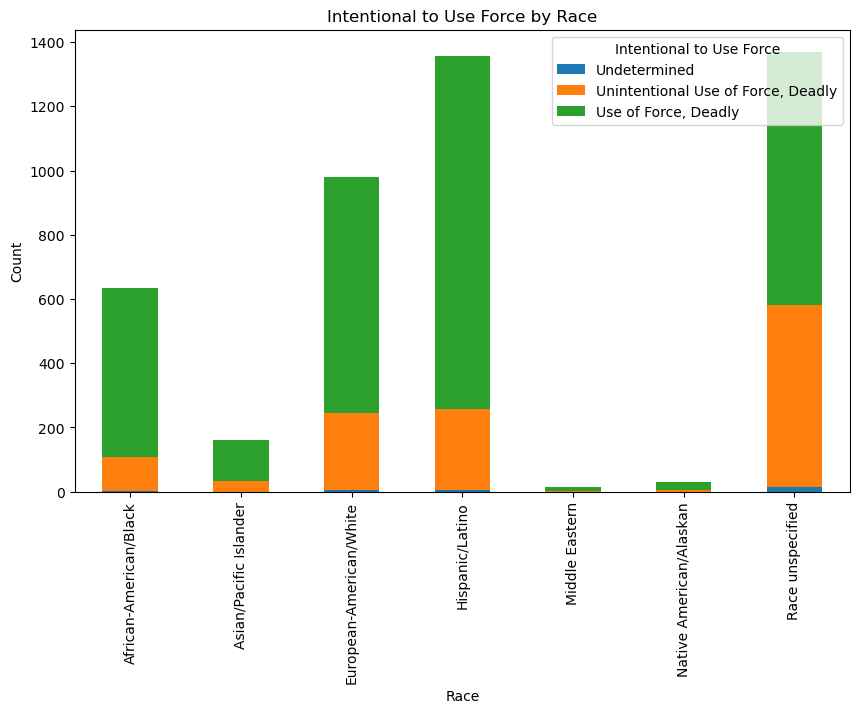

In [62]:
# Group the data by 'Race' and 'Intention_to_Use_Force' and count the occurrences
grouped = ca_df.groupby(['Subjects_race', 'Intentional_Use_of_Force_(Developing)']).size().unstack(fill_value=0)

# Create a bar chart and overlay the intention to use force
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot (add labels, legend, etc.)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Intentional to Use Force by Race')
plt.legend(title='Intentional to Use Force', loc='upper right')

# Show the plot
plt.show()